<h1 style="text-align: center;">Variable ACTIVIDAD</h1>

Cargamos el DataSet

In [2]:
import pandas as pd

dataset_work_4 = pd.read_csv('D:\DataSet\dataset_work_4.csv')
x = dataset_work_4.iloc[:,:-1]
y = dataset_work_4.iloc[:,-1].values
dataset_work_4.columns


Index(['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG',
       'TIENE_INCENTIVO_FISCAL', 'INCENTIVO_FISCAL_MONTO_IMP', 'PERCEPCIONES',
       'RETENCIONES', 'EMPLEADOS', 'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP',
       'TAMANO', 'ACTIVIDAD', 'INFLACION', 'MOROSIDAD'],
      dtype='object')

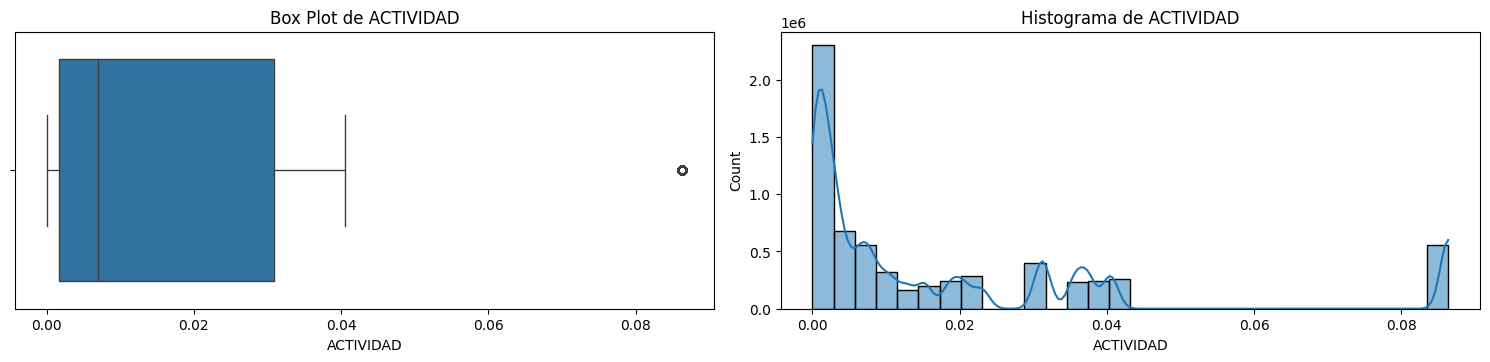

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 10))

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 1)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['ACTIVIDAD'])
plt.title('Box Plot de ACTIVIDAD')

# Crear el histograma
plt.subplot(3, 2, 2)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['ACTIVIDAD'], bins=30, kde=True)
plt.title('Histograma de ACTIVIDAD')


# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()

A partir de los diagramas Box Plot e Histograma se puede observar que la variable **ACTIVIDAD** tiene una distribución sesgada hacia la izquierda, con la presencia de algunos **outliers** notables. Estos factores indican que la variable no sigue una distribución normal, lo que podría impactar negativamente en la calidad de los modelos predictivos.

Podemos abordar la mejora de la variable **ACTIVIDAD** con la técnicas de transformacion de Yeo-Johnson:


### **Transformación de Box-Cox o Yeo-Johnson**:
La transformación Yeo-Johnson es una técnica que se utiliza para estabilizar la varianza y hacer que los datos se acerquen a una distribución normal, similar a lo que se hace con la transformación Box-Cox, pero con la ventaja de que puede manejar tanto valores negativos como cero, lo cual es una limitación de Box-Cox.


In [6]:
from sklearn.preprocessing import PowerTransformer

# Aplicar la transformación Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')
dataset_work_4['ACTIVIDAD_YJ'] = pt.fit_transform(dataset_work_4[['ACTIVIDAD']])

In [7]:
# Lista de variables numéricas a analizar
variables = ['ACTIVIDAD', 'ACTIVIDAD_YJ']

outliers_summary = {}

# Calcular outliers usando IQR para cada variable
for variable in variables:
    Q1 = dataset_work_4[variable].quantile(0.25)
    Q3 = dataset_work_4[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar outliers
    outliers = dataset_work_4[(dataset_work_4[variable] < lower_bound) | (dataset_work_4[variable] > upper_bound)]
    
    # Guardar resultados en un diccionario
    outliers_summary[variable] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': len(outliers)
    }

# Convertir el resumen de outliers en un DataFrame para una mejor visualización
outliers_summary_dataset_work_4 = pd.DataFrame(outliers_summary).T

print(outliers_summary_dataset_work_4)

              Lower Bound  Upper Bound  Number of Outliers
ACTIVIDAD       -0.042267     0.074787            555867.0
ACTIVIDAD_YJ    -3.922193     4.107343                 0.0


### Ordenamos las columnas

In [10]:
# Asegúrate de que las columnas de tu DataFrame estén en el orden correcto y eliminando las que no necesites
columns_order = ['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG',
       'TIENE_INCENTIVO_FISCAL', 'INCENTIVO_FISCAL_MONTO_IMP', 'PERCEPCIONES',
       'RETENCIONES', 'EMPLEADOS', 'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP',
       'TAMANO', 'ACTIVIDAD', 'ACTIVIDAD_YJ', 'INFLACION', 'MOROSIDAD']

# Reorganizar las columnas del DataFrame
dataset_work_4 = dataset_work_4[columns_order]
# Mostrar el DataFrame reorganizado
dataset_work_4.columns

Index(['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG',
       'TIENE_INCENTIVO_FISCAL', 'INCENTIVO_FISCAL_MONTO_IMP', 'PERCEPCIONES',
       'RETENCIONES', 'EMPLEADOS', 'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP',
       'TAMANO', 'ACTIVIDAD', 'ACTIVIDAD_YJ', 'INFLACION', 'MOROSIDAD'],
      dtype='object')

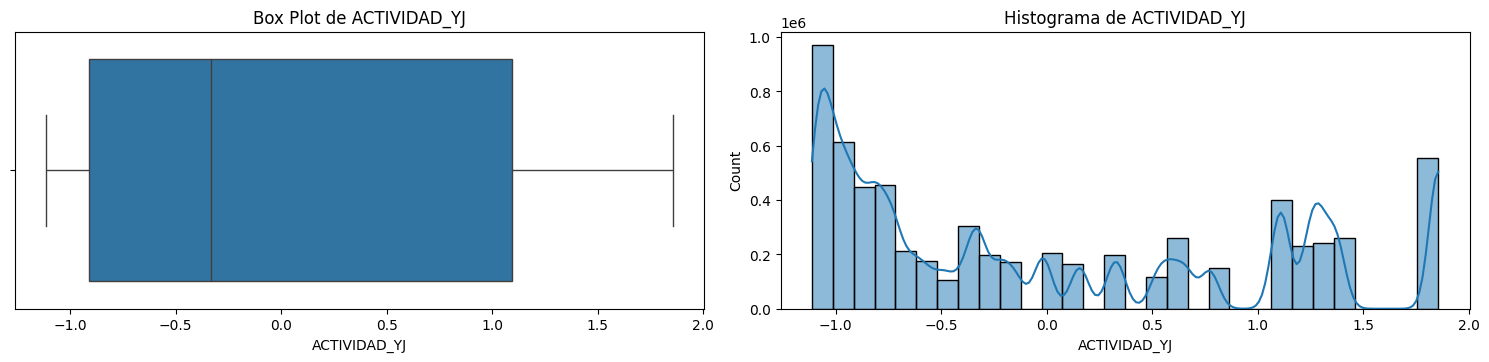

In [12]:
# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 10))

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 1)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['ACTIVIDAD_YJ'])
plt.title('Box Plot de ACTIVIDAD_YJ')

# Crear el histograma
plt.subplot(3, 2, 2)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['ACTIVIDAD_YJ'], bins=30, kde=True)
plt.title('Histograma de ACTIVIDAD_YJ')

# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()

**Resultados tras aplicar Yeo-Johnson:**

El boxplot de la variable ACTIVIDAD_YJ muestra que después de la transformación los outliers han sido eliminados. La caja se ha ampliado, lo que indica que los valores ahora están distribuidos de manera más simétrica y uniforme en comparación con los datos sin transformar.
El rango intercuartil (IQR) ahora está más equilibrado, lo que indica una mejor distribución de los datos alrededor de la mediana.

**Outliers:**

Según el análisis de límites, ACTIVIDAD_YJ no presenta ningún outlier después de la transformación (0 outliers). Esto se debe a que la transformación Yeo-Johnson ha comprimido los valores extremos, reduciendo su efecto y eliminando los valores atípicos que afectaban los análisis previos

Interpretación del resultado de los límites:

Ventajas de la Transformación Yeo-Johnson:
Normalización: Esta transformación ayuda a que los datos se distribuyan más de acuerdo con una distribución normal, lo que es crucial para muchos modelos predictivos que asumen normalidad en las variables.
Mejora la relación con otras variables predictoras: Como los outliers ya no distorsionan la relación entre las variables, es probable que las correlaciones con las variables predictoras mejoren. Esto optimiza el rendimiento de los modelos que dependen de esas relaciones, como la regresión lineal o los modelos de machine learning.

La transformación Yeo-Johnson ha ajustado la variable ACTIVIDAD de manera que ahora está mejor distribuida, sin outliers y con una mejor representación de los datos. Esto es ideal para su uso en modelos predictivos, ya que evitará que los valores extremos influyan de manera desproporcionada en los resultados.



In [13]:
dataset_work_5 = dataset_work_4.copy()

In [14]:
# Eliminamos las columnas indicadas del dataset
columnas_a_eliminar = ['ACTIVIDAD']

# Eliminar las columnas del dataframe
dataset_work_5 = dataset_work_5.drop(columns=columnas_a_eliminar, errors='ignore')  # errors='ignore' en caso de que no existan algunas columnas


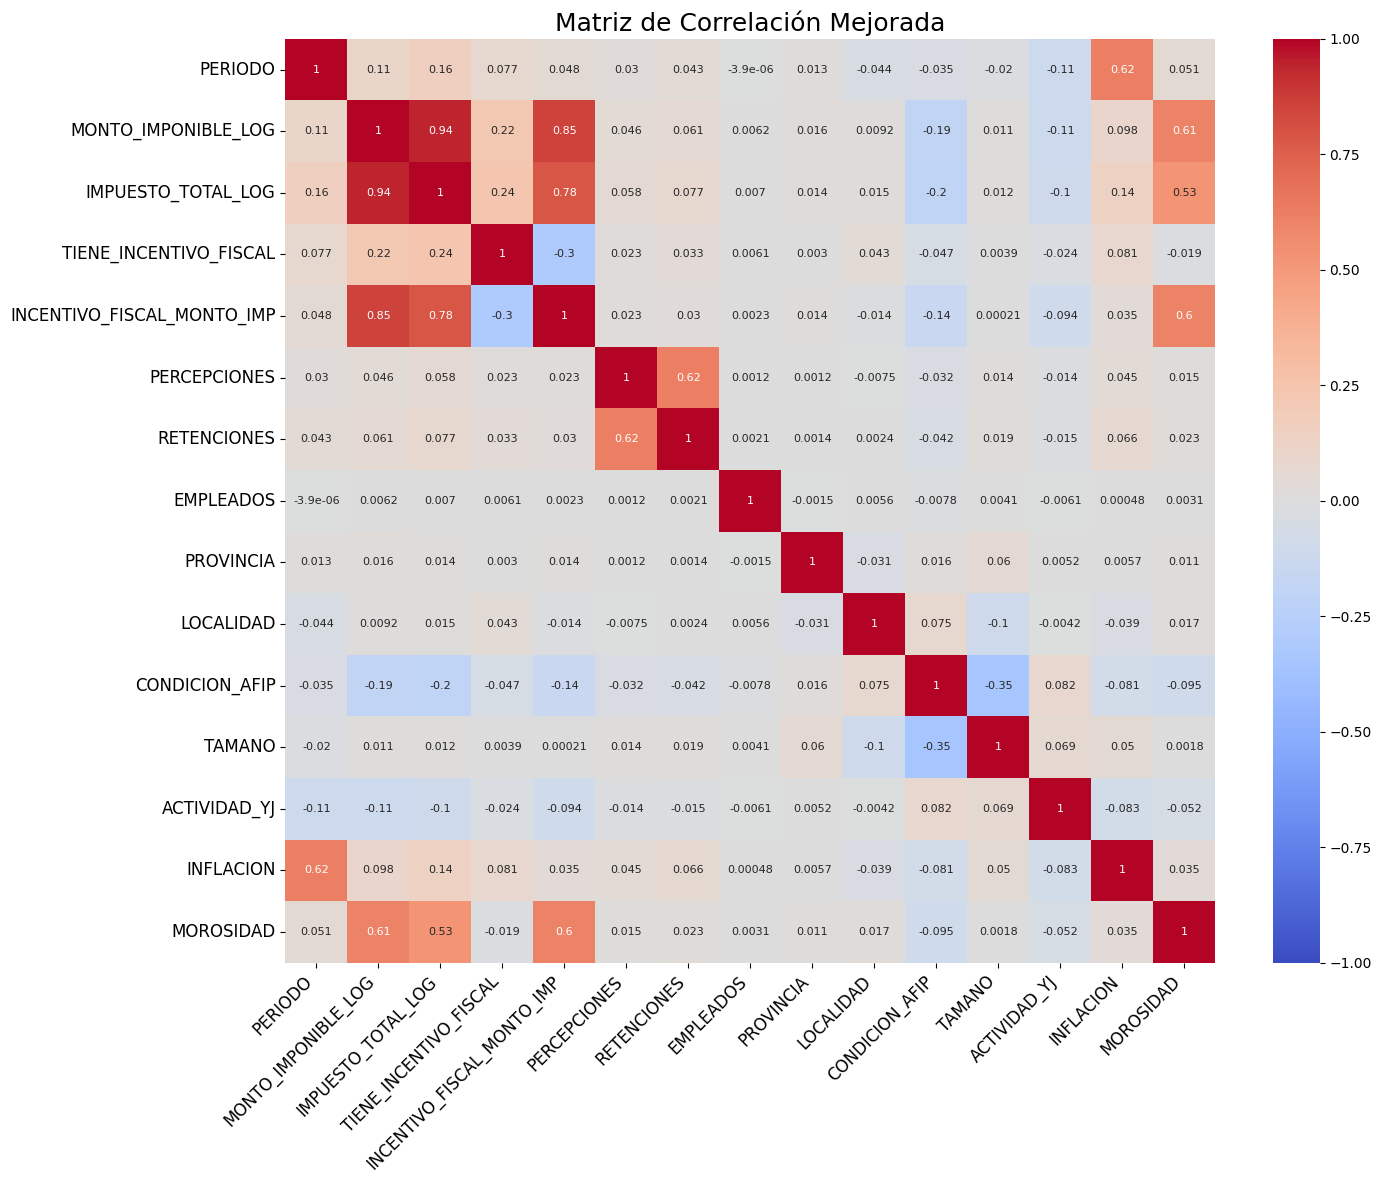

In [15]:
# Calculamos la matriz de correlación
correlation_matrix = dataset_work_5.corr()

# Ajustamos el tamaño de la figura y el tamaño de los números
plt.figure(figsize=(15, 12))  # Aumentamos el tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})  # Ajustamos el tamaño de las anotaciones
plt.title('Matriz de Correlación Mejorada', fontsize=18)  # Título más grande
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotamos y ajustamos las etiquetas del eje X
plt.yticks(fontsize=12)  # Ajustamos las etiquetas del eje Y
plt.show()

### Resguardamos el DataSet

Resguardamos el dataset resultante en un nuevo archivo para poder seguir procesandolo.

In [17]:
# Especifica el nombre del archivo CSV donde se guardarán los datos
output_file = 'D:\DataSet\dataset_work_5.csv'

# Guarda el DataFrame en un archivo CSV
dataset_work_5.to_csv(output_file, index=False, encoding='utf-8')

# Mensaje de confirmación
print(f'DataFrame guardado en {output_file}')

DataFrame guardado en D:\DataSet\dataset_work_5.csv
